### Graphviz 설치

In [1]:
# 트리 시각화 도구 설치
# 1. graphviz.org에서 graphviz 도구 다운로드 및 설치
# 2. python package 설치
# !pip install graphviz

# 트리모델

### 분류 (먼저)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer     # breast_cancer 분류 연습용 데이터

bc_dataset = load_breast_cancer()

X = bc_dataset['data']
y = bc_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
# 모델 훈련 (학습)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')   # criterion default : gini

dtc.fit(X_train, y_train)

dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.958041958041958)

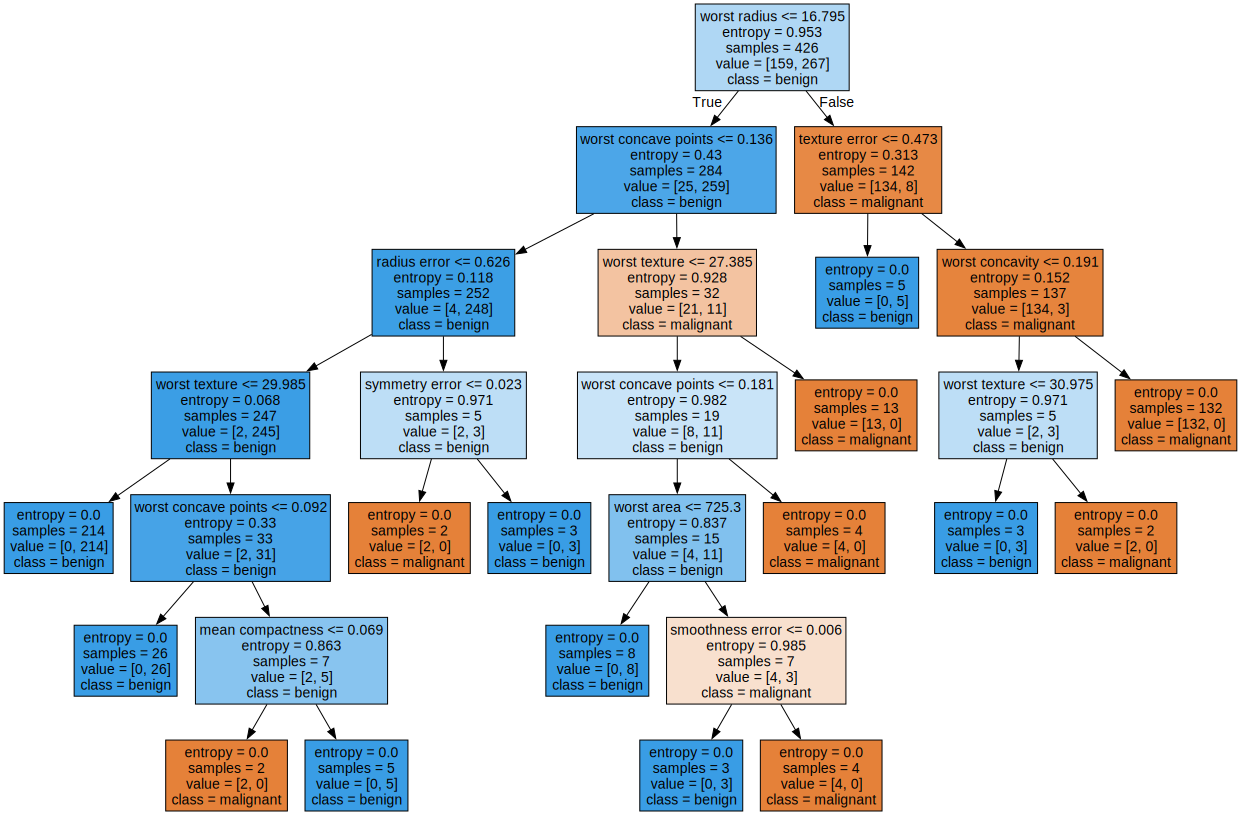

In [5]:
# 모델 시각화 - entropy
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dtc, out_file = "models/breast-cancer-model.dot",
                class_names = bc_dataset['target_names'],
                feature_names = bc_dataset['feature_names'],
                filled = True)  # filled는 꾸미기용

with open('models/breast-cancer-model.dot') as f:
    tree_graph_data = f.read()

graphviz.Source(tree_graph_data)

In [6]:
# 모델 훈련 (학습)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini')   # criterion default : gini

dtc.fit(X_train, y_train)

dtc.score(X_train, y_train), dtc.score(X_test, y_test)


(1.0, 0.9230769230769231)

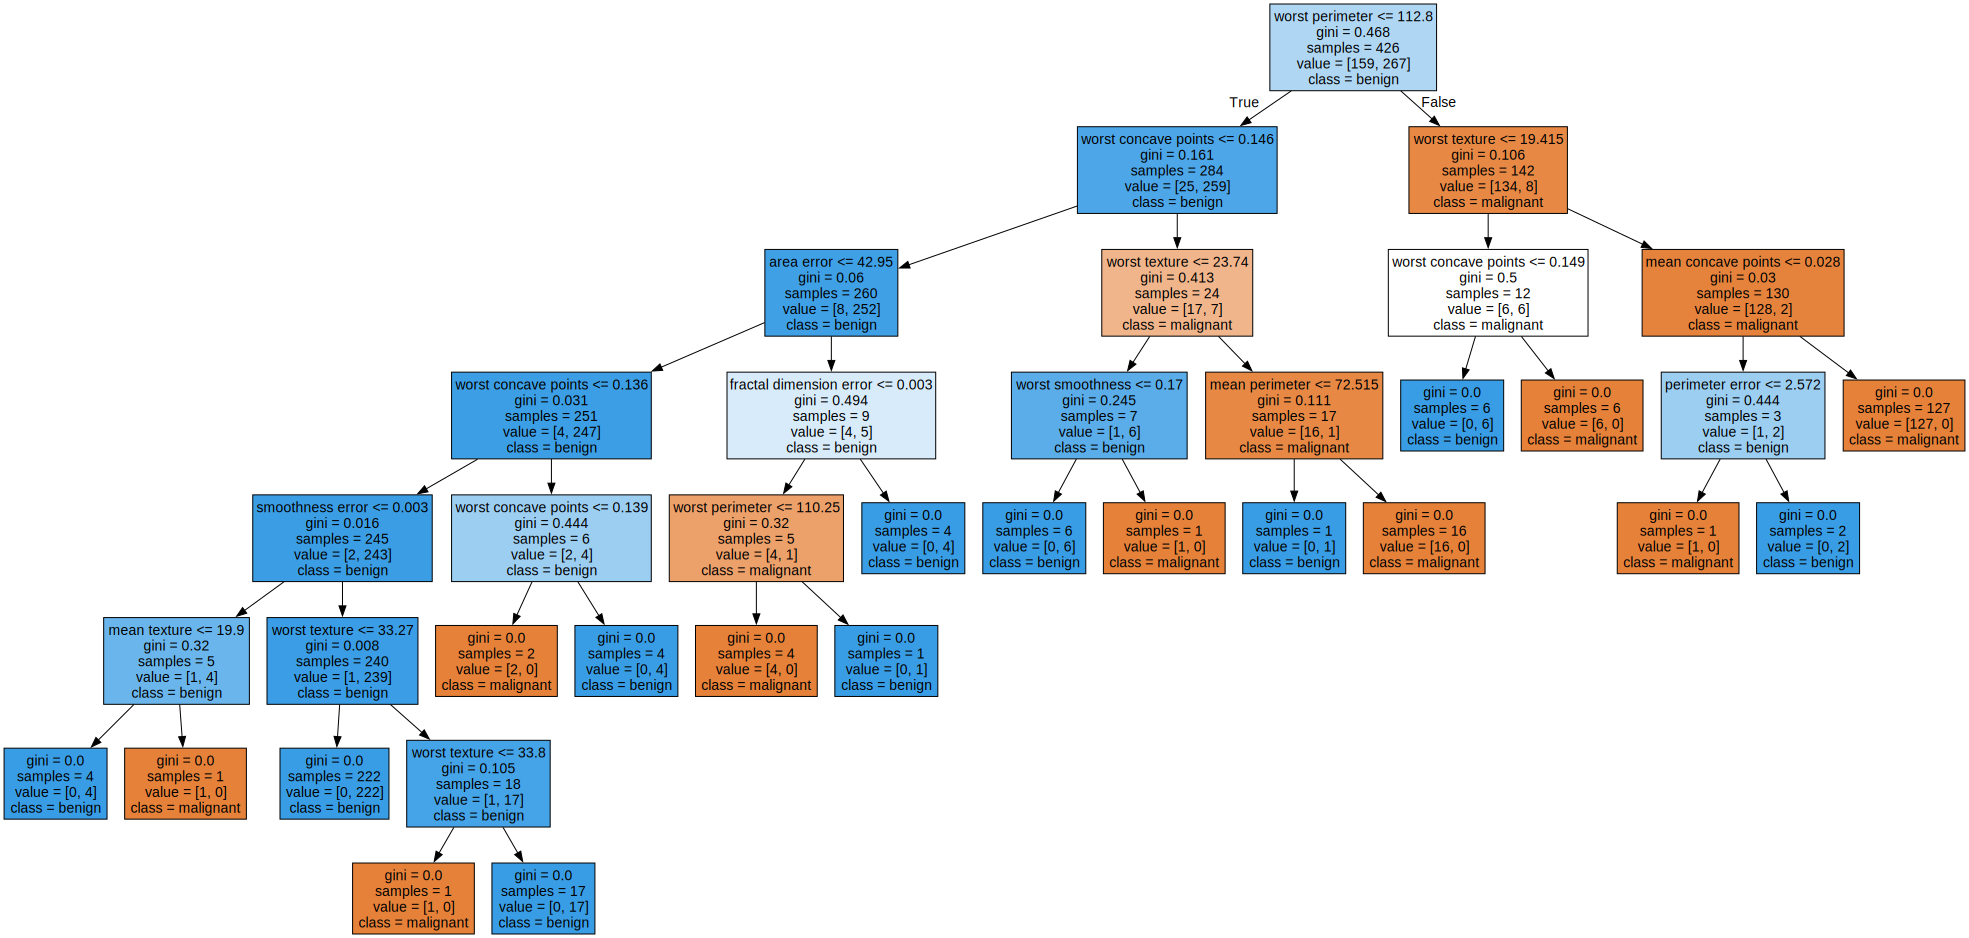

In [7]:
# 모델 시각화 - gini
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dtc, out_file = "models/breast-cancer-model.dot",
                class_names = bc_dataset['target_names'],
                feature_names = bc_dataset['feature_names'],
                filled = True)  # filled는 꾸미기용

with open('models/breast-cancer-model.dot') as f:
    tree_graph_data = f.read()

graphviz.Source(tree_graph_data)

트리 복잡도 제어

In [8]:
# dtc2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

dtc2.fit(X_train, y_train)
dtc2.score(X_train, y_train), dtc2.score(X_test, y_test)

(0.9765258215962441, 0.9300699300699301)

In [9]:
# 특성 중요도 출력
for fn, fi in zip(bc_dataset['feature_names'], dtc2.feature_importances_):
    print("{0} : {1}".format(fn, fi))

mean radius : 0.0
mean texture : 0.0
mean perimeter : 0.0
mean area : 0.0
mean smoothness : 0.0
mean compactness : 0.0
mean concavity : 0.0
mean concave points : 0.0
mean symmetry : 0.0
mean fractal dimension : 0.0
radius error : 0.0
texture error : 0.05103680493153673
perimeter error : 0.0
area error : 0.00807144750312093
smoothness error : 0.0020153132952080268
compactness error : 0.0
concavity error : 0.0
concave points error : 0.0
symmetry error : 0.0
fractal dimension error : 0.0
worst radius : 0.7431922188156047
worst texture : 0.034530864360105155
worst perimeter : 0.0
worst area : 0.006433976227515072
worst smoothness : 0.011259458398151368
worst compactness : 0.0
worst concavity : 0.01859747873062752
worst concave points : 0.12486243773813062
worst symmetry : 0.0
worst fractal dimension : 0.0


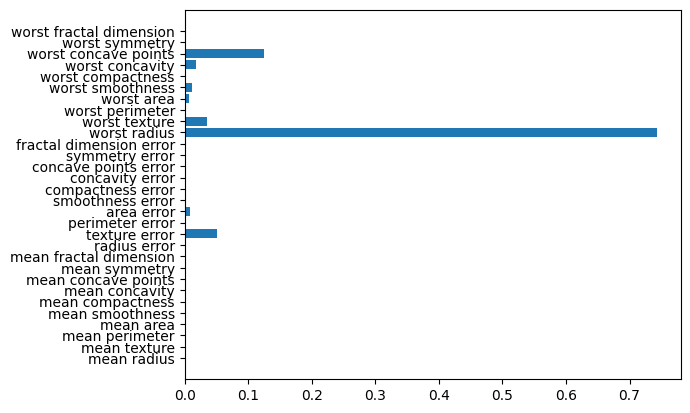

In [10]:
# 특성 중요도 시각화
plt.barh(bc_dataset['feature_names'], dtc2.feature_importances_)
plt.show()

### ram_price.csv

회귀트리모델

In [23]:
# 데이터 준비 1
ram_price_df = pd.read_csv('data-files/ram_price.csv')
ram_price_df.head() # 인덱스가 들어간 상태로 저장되어서 unnmaed:0컬럼 존재
# ram_price_df = ram_price_df.drop(ram_price_df.columns[0], axis=1) # 컬럼을 지우고 새로운 df에 저장
ram_price_df.drop(ram_price_df.columns[0], axis=1, inplace=True)    # 원본 자체에서 컬럼을 지우는 방법
ram_price_df.head(2), ram_price_df.tail(2), ram_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    333 non-null    float64
 1   price   333 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB


(     date        price
 0  1957.0  411041792.0
 1  1959.0   67947725.0,
         date   price
 331  2015.83  0.0038
 332  2015.92  0.0037,
 None)

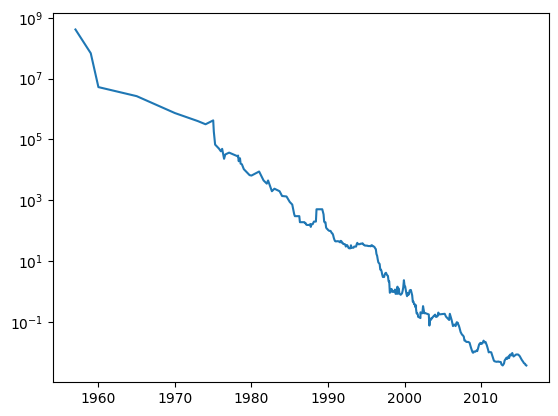

In [22]:
# plt.plot(ram_price_df["date"], ram_price_df['price'])       # x축은 date, y축은 price
plt.semilogy(ram_price_df["date"], ram_price_df['price'])    # y값이 커서 y값에만 log취함
plt.show()

In [32]:
# 데이터 준비 2 (훈련/테스트)
train_set = ram_price_df[ram_price_df['date'] < 2000]
test_set = ram_price_df[ram_price_df['date'] >= 2000]

X_train, y_train = train_set['date'].values, train_set['price'].values
X_test, y_test = test_set['date'].values, test_set['price'].values

print( X_train.shape, y_train.shape )   # X_train이 1차원 array인 것을 확인 -> 변경 필요

# reshape test
# X_train.reshape((-1, 1)).shape  # ((, 1))열은 고정 1개를 쓴다, ((-1, 1)) 행은 기존 데이터(202)에 맞춰라
# X_train.reshape((1, -1)).shape  # ((1, -1)) 1행 202열된다. 
# X_train.reshape((-1, 2)).shape  # ((1, -1)) 101행 2열 된다. 지정한 위치는 그대로 쓰고, -1은 그에 따라 맞춤
# X_train.reshape((101, 2)).shape  # ((1, -1)) 101행 2열 된다. 위와 같은 결과

X_train, X_test  = X_train.reshape((-1, 1)), X_test.reshape((-1, 1))
print( X_train.shape, X_test.shape )    # 2차원 배열로 변경된 것 확인

y_train2 = np.log(y_train)
y_test2 = np.log(y_test)


(202,) (202,)
(202, 1) (131, 1)


In [ ]:
# 트리 기반 회귀 모델 훈련 (학습)
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train2)

dtr.score(X_train, y_train2), dtr.score(X_test, y_test2)    # 문제 확인

(1.0, -5.229712351825342)

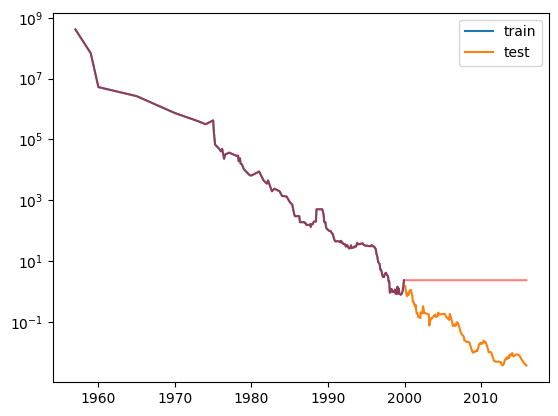

In [ ]:
# 문제 원인 확인

X = ram_price_df[['date']].values
X.shape
y = ram_price_df['price'].values
y_predicted = dtr.predict(X)    # 로그 안 씌운 y를 사용하면 이거만 사용
y_predicted2 = np.exp(y_predicted)    # y_2는 로그 씐 값이므로 exp로 그걸 풀어줌
# ram_price_df[['date']].values 컬럼을 리스트처럼 주면, 배열을 1차원이 아닌 2차원으로 뽑는다

# 시각화
plt.semilogy(train_set['date'], train_set['price'], label='train')
plt.semilogy(test_set['date'], test_set['price'], label='test')
# plt.semilogy(X, y_predicted, c='r', alpha = 0.5)    # y_train으로 훈련한 모델
plt.semilogy(X, y_predicted2, c='r', alpha = 0.5)   # y_train2로 훈련한 모델
# 결과보면 훈련은 100%, test에서는 수평선을 그어버림
plt.legend()
plt.show()